## 1 Criar DataFrame para análise

In [58]:
## Importar bibliotecas essenciais
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ncr_ride_bookings.csv')
print(f"✅ Dataset carregado com sucesso!")
print(f"📊 Total de registros: {len(df):,.0f}")
print(f"📋 Total de colunas: {len(df.columns)}")

✅ Dataset carregado com sucesso!
📊 Total de registros: 150,000
📋 Total de colunas: 21


---
## 2️ Visão dos dados
2.1 Primeiras linhas

In [59]:
## Ler as primeiras linhas do dataset para entender os dados.
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


2.2 Informações do dataset: tipo de dados e dimensões da tabela

In [60]:
df.info()
dimensao = df.shape
print(f"📐 Dimensão do dataset: {dimensao[0]:,.0f} registros e {dimensao[1]} colunas.")

<class 'pandas.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  str    
 1   Time                               150000 non-null  str    
 2   Booking ID                         150000 non-null  str    
 3   Booking Status                     150000 non-null  str    
 4   Customer ID                        150000 non-null  str    
 5   Vehicle Type                       150000 non-null  str    
 6   Pickup Location                    150000 non-null  str    
 7   Drop Location                      150000 non-null  str    
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  10500 non-null 

2.3 Análise de dados faltantes

In [61]:
nan_percent = df.isnull().sum() / len(df) * 100
nan_table = pd.DataFrame({'Total NaNs': df.isnull().sum(), 'Percent (%)': nan_percent})
nan_table = nan_table[nan_table['Total NaNs'] > 0].sort_values(by='Total NaNs', ascending=False)
print(nan_table)

                                   Total NaNs  Percent (%)
Incomplete Rides                       141000         94.0
Incomplete Rides Reason                141000         94.0
Cancelled Rides by Customer            139500         93.0
Reason for cancelling by Customer      139500         93.0
Cancelled Rides by Driver              123000         82.0
Driver Cancellation Reason             123000         82.0
Driver Ratings                          57000         38.0
Customer Rating                         57000         38.0
Avg CTAT                                48000         32.0
Ride Distance                           48000         32.0
Booking Value                           48000         32.0
Payment Method                          48000         32.0
Avg VTAT                                10500          7.0


2.4 Higienização dos dados

In [62]:
## Remover duplicatas
df.drop_duplicates(inplace=True)
print(f"✅ Duplicatas removidas. Total de registros agora: {len(df):,.0f}")

✅ Duplicatas removidas. Total de registros agora: 150,000


---
## 3 Extraindo informações
3.1 Descobrindo a demanda por horário

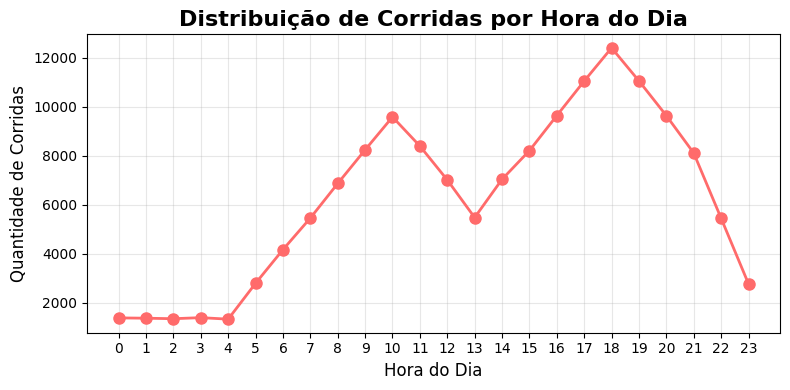

In [69]:
# Criar coluna DateTime combinando Date e Time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extrair a hora
df['Hour'] = df['DateTime'].dt.hour

# Agrupar por hora
hourly_rides = df.groupby('Hour').size().sort_index()

# Criar gráfico de linha
plt.figure(figsize=(8, 4))
plt.plot(hourly_rides.index, hourly_rides.values, marker='o', linewidth=2, markersize=8, color='#FF6B6B')
plt.title('Distribuição de Corridas por Hora do Dia', fontsize=16, fontweight='bold')
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade de Corridas', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

3.2 Descobrindo o tipo de veiculo mais utilizado

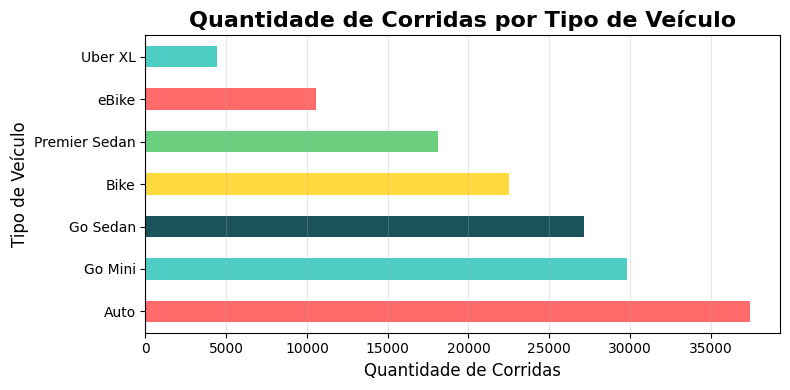

In [64]:
# Gráfico de barras horizontal
vehicle_counts = df['Vehicle Type'].value_counts()
plt.figure(figsize=(8, 4))
vehicle_counts.plot(kind='barh', color=['#FF6B6B', '#4ECDC4', '#1A535C', '#FFD93D', '#6BCF7F'])
plt.title('Quantidade de Corridas por Tipo de Veículo', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade de Corridas', fontsize=12)
plt.ylabel('Tipo de Veículo', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()